In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("train.csv")
t_data = pd.read_csv("test.csv")

In [3]:
# Describe
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,0.361392,32.204208,1.217733
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,0.480674,49.693429,0.523343
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,1.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000,512.329200,3.000000


In [4]:
print (data.shape)

(891, 9)


In [5]:
data.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Embarked    float64
dtype: object

In [6]:
data.isnull().sum() / data.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.000000
dtype: float64

In [7]:
t_data.isnull().sum() / t_data.shape[0]

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.636364
Fare        0.002392
Embarked    0.000000
dtype: float64

In [8]:
data["Age"].fillna(data["Age"].median(), inplace = True)

In [9]:
data.isnull().sum() / data.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [10]:
t_data["Age"].fillna(t_data["Age"].median(), inplace = True)
t_data["Fare"].fillna(t_data["Fare"].median(), inplace = True)

In [11]:
t_t_O: list = []
for i in range(t_data.shape[0]):
    if t_data["Ticket"].isna()[i]:
        t_t_O.append(i)
t_data.drop(t_t_O, axis = 0, inplace = True)

In [12]:
t_data.isnull().sum() / t_data.shape[0]

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

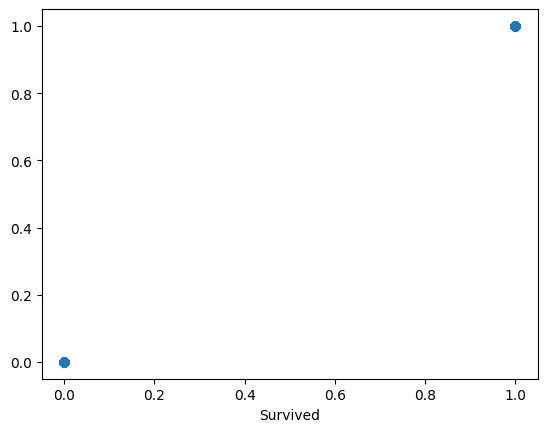

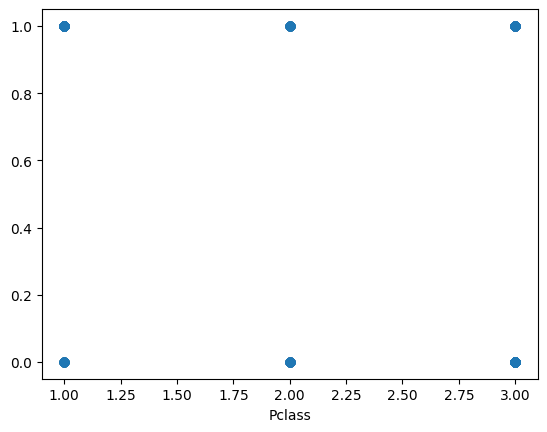

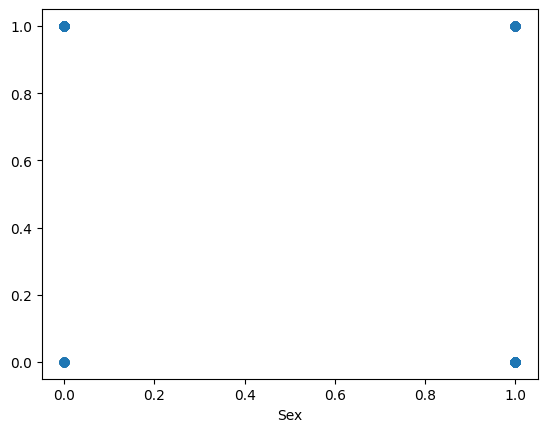

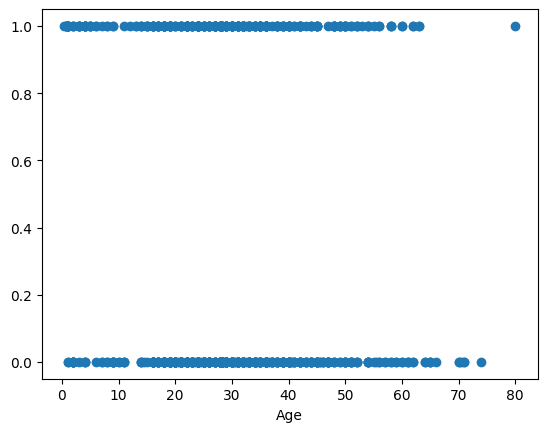

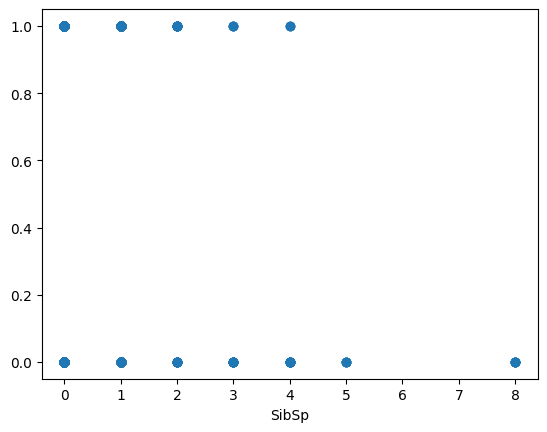

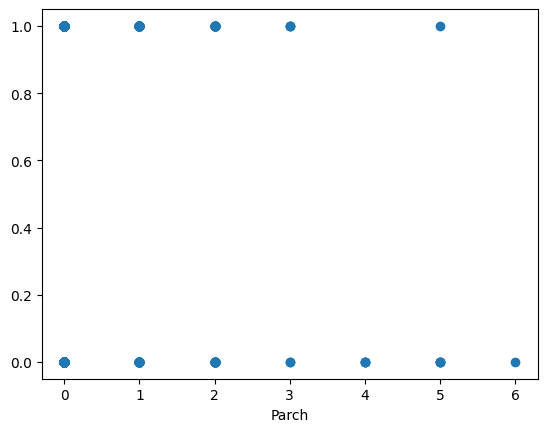

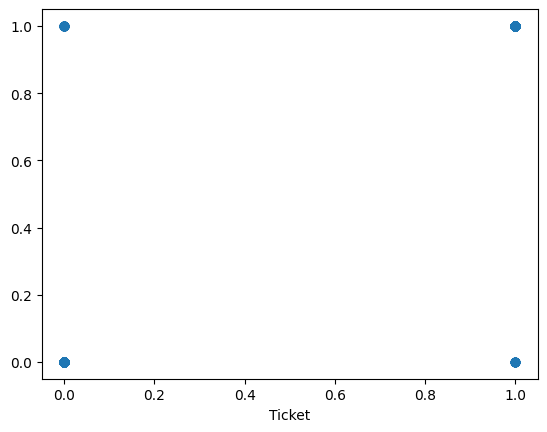

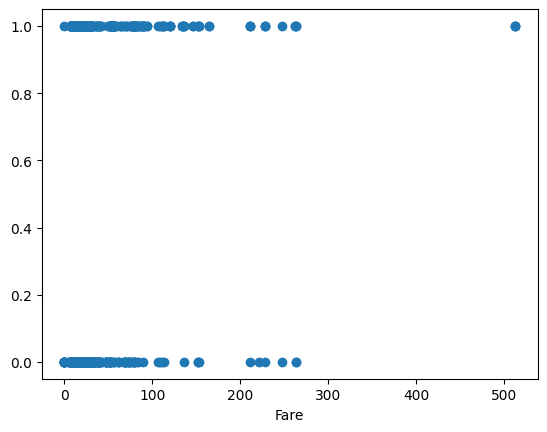

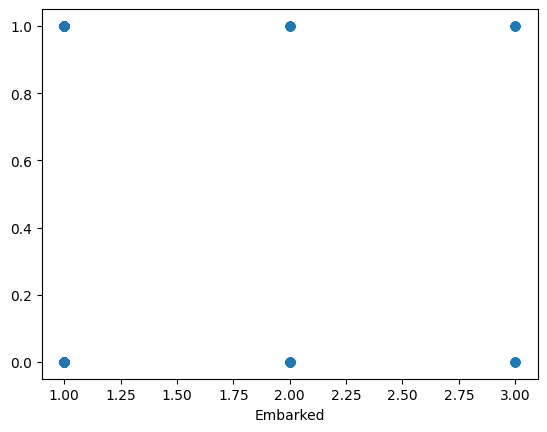

In [13]:
# Visulize
for col in data.columns:
    plt.scatter(data[col], data["Survived"])
    plt.xlabel(col)
    plt.show()

In [14]:
corr = data.corr()["Survived"]
corr

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Ticket      0.876252
Fare        0.257307
Embarked    0.028836
Name: Survived, dtype: float64

In [15]:
cols: list = []
for col in data.columns:
    if abs(corr[col]) > 0.3:
        cols.append(col)
print (cols)

['Survived', 'Pclass', 'Sex', 'Ticket']


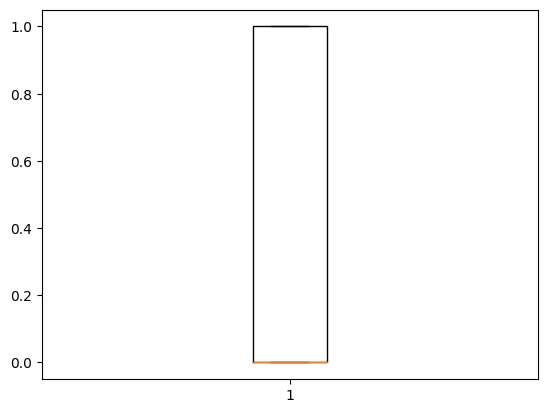

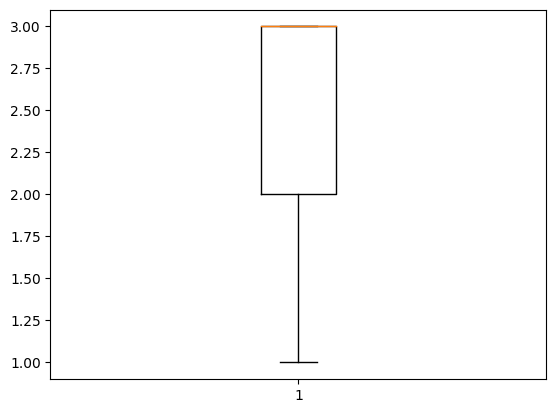

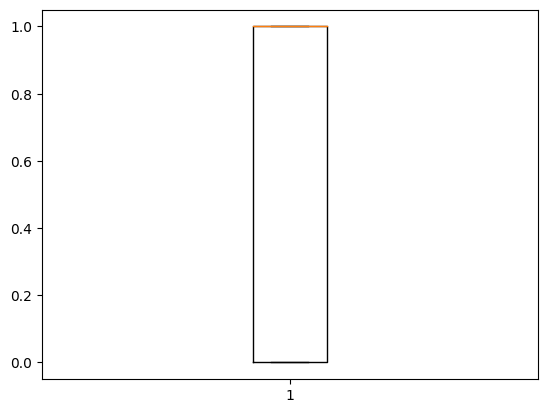

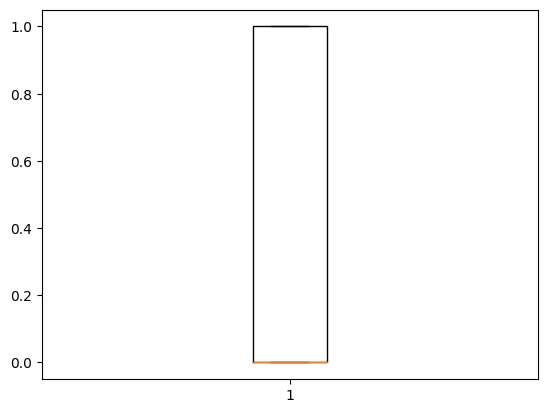

In [16]:
# Outliers
for col in cols:
    plt.boxplot(data[col])
    plt.show()

In [17]:
# Save the changes
data["Survived"].to_csv("y_train.csv", index = False)
cols.remove("Survived")
data[cols].to_csv("x_train.csv", index = False)


t_data[cols].to_csv("x_test.csv", index = False)

y_test = pd.read_csv("../gender_submission.csv")
y_test.drop(t_t_O, axis = 0, inplace = True)
y_test.to_csv("y_test.csv", index = False)